In [244]:
import cv2
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import numpy as np


def obtener_palabra_clave():
    palabras_clave_validas = ["Youtube", "Instagram", "Twitter", "Facebook"]

    while True:
        palabra_clave = input("Ingrese la palabra clave (Youtube, Instagram, Twitter o Facebook): ")
        if palabra_clave in palabras_clave_validas:
            return palabra_clave
        else:
            print("Palabra clave no válida. Intente de nuevo.")

def cargar_imagen(nombre_imagen, palabra_clave):
    try:
        # Verificar si el archivo existe antes de intentar cargarlo
        img_cv2 = np.array(nombre_imagen)

        # Dimensiones recomendadas para cada plataforma
        dimensiones_plataforma = {
            "Youtube": (1280, 720),
            "Instagram": (1080, 1080),
            "Twitter": (1200, 675),
            "Facebook": (1200, 630)
        }

        # Obtener las dimensiones recomendadas para la palabra clave
        dimensiones = dimensiones_plataforma.get(palabra_clave)

        # Redimensionar la imagen manteniendo la proporción
        img_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
        img_pil = Image.fromarray(img_rgb)
        img_pil.thumbnail(dimensiones)

        print(f"Imagen redimensionada para {palabra_clave}. Dimensiones: {dimensiones}")
        return img_pil
    except FileNotFoundError:
        print(f"Error: El archivo '{nombre_imagen}' no existe. Intente de nuevo.")
        return None
    except Exception as e:
        print(f"Error al cargar/redimensionar la imagen: {e}")
        return None

def mostrar_imagen_matplotlib(imagen_pil, titulo="Imagen Redimensionada"):
    img_np = np.array(imagen_pil)
    img_np = cv2.cvtColor(img_np,cv2.COLOR_BGR2RGB)
    plt.imshow(img_np)
    plt.title(titulo)
    plt.axis('off')  # Desactivar ejes
    plt.show()


def ajustar_contraste_histograma(imagen_pil):
    try:
        # Convertir la imagen de Pillow a una matriz numpy
        img_np = np.array(imagen_pil)
        img_np = cv2.cvtColor(img_np,cv2.COLOR_BGR2RGB)

        # Calcular el histograma y la función de distribución acumulativa (CDF) de cada canal de color original
        hist_canal_r_orig, bins_canal_r_orig = np.histogram(img_np[:, :, 0].flatten(), 256, [0, 256])
        hist_canal_g_orig, bins_canal_g_orig = np.histogram(img_np[:, :, 1].flatten(), 256, [0, 256])
        hist_canal_b_orig, bins_canal_b_orig = np.histogram(img_np[:, :, 2].flatten(), 256, [0, 256])

        cdf_canal_r_orig = hist_canal_r_orig.cumsum()
        cdf_canal_g_orig = hist_canal_g_orig.cumsum()
        cdf_canal_b_orig = hist_canal_b_orig.cumsum()

        cdf_canal_r_normalized_orig = cdf_canal_r_orig * float(hist_canal_r_orig.max()) / cdf_canal_r_orig.max()
        cdf_canal_g_normalized_orig = cdf_canal_g_orig * float(hist_canal_g_orig.max()) / cdf_canal_g_orig.max()
        cdf_canal_b_normalized_orig = cdf_canal_b_orig * float(hist_canal_b_orig.max()) / cdf_canal_b_orig.max()

        # Ecualizar cada canal de color independientemente
        canal_r_ecualizado = cv2.equalizeHist(img_np[:, :, 0])
        canal_g_ecualizado = cv2.equalizeHist(img_np[:, :, 1])
        canal_b_ecualizado = cv2.equalizeHist(img_np[:, :, 2])

        # Calcular el histograma y la función de distribución acumulativa (CDF) de cada canal de color ecualizado
        hist_canal_r, bins_canal_r = np.histogram(canal_r_ecualizado.flatten(), 256, [0, 256])
        hist_canal_g, bins_canal_g = np.histogram(canal_g_ecualizado.flatten(), 256, [0, 256])
        hist_canal_b, bins_canal_b = np.histogram(canal_b_ecualizado.flatten(), 256, [0, 256])

        cdf_canal_r = hist_canal_r.cumsum()
        cdf_canal_g = hist_canal_g.cumsum()
        cdf_canal_b = hist_canal_b.cumsum()

        cdf_canal_r_normalized = cdf_canal_r * float(hist_canal_r.max()) / cdf_canal_r.max()
        cdf_canal_g_normalized = cdf_canal_g * float(hist_canal_g.max()) / cdf_canal_g.max()
        cdf_canal_b_normalized = cdf_canal_b * float(hist_canal_b.max()) / cdf_canal_b.max()

        # Mostrar las imágenes y los histogramas en una misma figura
        fig, axs = plt.subplots(2, 2, figsize=(15, 15))

        # Mostrar la imagen original
        axs[0, 0].imshow(img_np)
        axs[0, 0].set_title("Imagen Original")
        axs[0, 0].axis('off')

        # Mostrar el histograma y el CDF de los canales de color originales
        axs[0, 1].hist(img_np[:, :, 0].flatten(), 256, [0, 256], color="r", alpha=0.5, label="Rojo")
        axs[0, 1].hist(img_np[:, :, 1].flatten(), 256, [0, 256], color="g", alpha=0.5, label="Verde")
        axs[0, 1].hist(img_np[:, :, 2].flatten(), 256, [0, 256], color="b", alpha=0.5, label="Azul")
        axs[0, 1].plot(cdf_canal_r_normalized_orig, color="r", label="Rojo (distribucion)")
        axs[0, 1].plot(cdf_canal_g_normalized_orig, color="g", label="Verde (distribucion)")
        axs[0, 1].plot(cdf_canal_b_normalized_orig, color="b", label="Azul (distribucion)")
        axs[0, 1].set_title("Histogramas y distribucion de Canales de Color Original")
        axs[0, 1].legend()

        # Mostrar la imagen ecualizada
        axs[1, 0].imshow(np.stack((canal_r_ecualizado, canal_g_ecualizado, canal_b_ecualizado), axis=-1))
        axs[1, 0].set_title("Imagen Ecualizada")
        axs[1, 0].axis('off')

        # Mostrar el histograma y el CDF de los canales de color ecualizados
        axs[1, 1].hist(canal_r_ecualizado.flatten(), 256, [0, 256], color="r", alpha=0.5, label="Rojo")
        axs[1, 1].hist(canal_g_ecualizado.flatten(), 256, [0, 256], color="g", alpha=0.5, label="Verde")
        axs[1, 1].hist(canal_b_ecualizado.flatten(), 256, [0, 256], color="b", alpha=0.5, label="Azul")
        axs[1, 1].plot(cdf_canal_r_normalized, color="r", label="Rojo (distribucion)")
        axs[1, 1].plot(cdf_canal_g_normalized, color="g", label="Verde (distribucion)")
        axs[1, 1].plot(cdf_canal_b_normalized, color="b", label="Azul (distribucion)")
        axs[1, 1].set_title("Histogramas y distribucion de Canales de Color Ecualizado")
        axs[1, 1].legend()

        plt.show()

        img_ecualizada_rgb = cv2.merge([canal_b_ecualizado, canal_g_ecualizado, canal_r_ecualizado])
        img_ecualizada_pil = Image.fromarray(img_ecualizada_rgb)
        return img_ecualizada_pil
    except Exception as e:
        print(f"Error al ajustar el contraste: {e}")
        return None

def aplicar(matriz, relativa):
    matriz = matriz.astype(np.float32) * relativa.astype(np.float32)
    matriz = np.round(matriz).astype(np.uint8)
    return matriz

def ajustar_contraste_histograma_propio(img_cv2):
    try:
        # Convertir la imagen de Pillow a una matriz numpy
        img_array = np.array(img_cv2)
        img2_cv2 = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)
        img_gris = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)
        imagen_equalizada = cv2.equalizeHist(img_gris)

        epsilon = 70
        variacion_relativa = (imagen_equalizada.astype(np.float32)) / (img_gris.astype(np.float32) + epsilon)

        R = img_array[:, :, 0]
        G = img_array[:, :, 1]
        B = img_array[:, :, 2]

        R_nuevo = aplicar(R, variacion_relativa)
        G_nuevo = aplicar(G, variacion_relativa)
        B_nuevo = aplicar(B, variacion_relativa)

        nueva_imagen = np.stack(( B_nuevo, G_nuevo,R_nuevo), axis=-1)

# Mostrar la imagen original y la nueva imagen en un solo gráfico
        plt.figure(figsize=(15, 8))

# Imagen original
        plt.subplot(2, 2, 1)
        plt.imshow(img2_cv2)
        plt.title('Imagen Original')
        plt.axis('off')

# Histograma de la imagen original
        plt.subplot(2, 2, 2)
        plt.hist(img_array.flatten(), 256, [0, 256], color='gray', alpha=0.7)
        plt.title('Histograma Original')

# Nueva imagen
        plt.subplot(2, 2, 3)
        plt.imshow(nueva_imagen)
        plt.title('Nueva Imagen')
        plt.axis('off')

# Histograma de la nueva imagen
        plt.subplot(2, 2, 4)
        plt.hist(nueva_imagen.flatten(), 256, [0, 256], color='gray', alpha=0.7)
        plt.title('Histograma Nueva Imagen')

        plt.show()
        img_ecualizada_pil = Image.fromarray(nueva_imagen)
        return img_ecualizada_pil
    except Exception as e:
        print(f"Error al ajustar el contraste: {e}")
        return None

def mostrar_plt_de_filtros(imagen_pil):
    try:
        # Convertir la imagen de Pillow a una matriz numpy
        img_np = np.array(imagen_pil)

        # Ajustar el orden de los canales de color (de BGR a RGB)
        img_rgb = Image.fromarray(img_np[:, :, ::-1])

        # Mostrar las imágenes en una misma figura
        plt.figure(figsize=(15, 5))

        # Mostrar la imagen original
        plt.subplot(2, 5, 1)
        plt.imshow(img_rgb)
        plt.title("Original")
        plt.axis('off')

        # Iterar sobre todos los filtros y mostrar las imágenes filtradas
        nombres_filtros = [
            "BLUR", "CONTOUR", "DETAIL",
            "EDGE_ENHANCE", "EDGE_ENHANCE_MORE",
            "EMBOSS", "FIND_EDGES",
            "SHARPEN", "SMOOTH"
        ]

        for i, filtro in enumerate(nombres_filtros, start=2):
            # Aplicar el filtro directamente a la imagen original
            imagen_filtrada = img_rgb.filter(ImageFilter.__dict__[filtro])

            plt.subplot(2, 5, i)
            plt.imshow(imagen_filtrada)
            plt.title(filtro)
            plt.axis('off')

        plt.show()

        return None  # No hay imagen filtrada para devolver en este caso
    except Exception as e:
        print(f"Error al aplicar los filtros: {e}")
        return None


def dibujar_boceto_persona(imagen, persona=True):
    try:
        if not persona:
            print("No hay persona en el dibujo.")
            return imagen  # Devuelve la imagen original si no hay persona

        # Convertir la imagen a formato numpy
        imagen_np = np.array(imagen)

        # Ajustar el orden de los canales de color (de BGR a RGB)
        imagen_np_rgb = imagen_np[:, :, ::-1]

        # Convertir la imagen a escala de grises
        imagen_gris = cv2.cvtColor(imagen_np_rgb, cv2.COLOR_RGB2GRAY)

        # Aplicar un filtro de desenfoque para suavizar la imagen y reducir el ruido
        imagen_suavizada = cv2.GaussianBlur(imagen_gris, (5, 5), 0)

        # Aplicar el detector de bordes utilizando el operador de Canny
        bordes = cv2.Canny(imagen_suavizada, 50, 150)

        # Convertir la imagen de boceto a formato RGB
        bordes_rgb = cv2.cvtColor(bordes, cv2.COLOR_GRAY2RGB)

        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(imagen_np_rgb)
        plt.title("Imagen Original")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(bordes_rgb)
        plt.title("Boceto de la Persona")
        plt.axis('off')

        plt.show()

        return bordes_rgb  # Devuelve la imagen con el boceto

    except Exception as e:
        print(f"Error al dibujar el boceto de la persona: {e}")
        return imagen  # Devuelve la imagen original en caso de error


def guardar_imagen(imagen, nombre_archivo="MiImagen.jpg"):
    try:
        imagen.save(nombre_archivo)
        print(f"Imagen guardada como '{nombre_archivo}' exitosamente.")
    except Exception as e:
        print(f"Error al guardar la imagen: {e}")


def seleccionar_filtro():
    while True:
        try:
            nombres_filtros = [
                "BLUR", "CONTOUR", "DETAIL",
                "EDGE_ENHANCE", "EDGE_ENHANCE_MORE",
                "EMBOSS", "FIND_EDGES",
                "SHARPEN", "SMOOTH"
            ]

            print("\nSeleccione un filtro:")
            for i, filtro in enumerate(nombres_filtros, start=1):
                print(f"{i}. {filtro}")

            filtro_seleccionado = input("Ingrese el número del filtro: ")

            try:
                filtro_seleccionado = int(filtro_seleccionado)
                if 1 <= filtro_seleccionado <= len(nombres_filtros):
                    return nombres_filtros[filtro_seleccionado - 1]
                else:
                    print("Número de filtro no válido. Intente de nuevo.")
            except ValueError:
                print("Por favor, ingrese un número válido. Intente de nuevo.")

        except Exception as e:
            print(f"Error al seleccionar el filtro: {e}")

        print()  # Agregar una línea en blanco para mejorar la legibilidad


def aplicar_filtro(filtro, imagen_pil):
    try:
        # Convertir la imagen de Pillow a una matriz numpy
        img_np = np.array(imagen_pil)

        # Convertir la imagen de nuevo a formato Pillow antes de aplicar el filtro
        imagen_pil_temp = Image.fromarray(img_np)

        # Aplicar el filtro seleccionado
        imagen_modificada = imagen_pil_temp.filter(ImageFilter.__dict__[filtro])

        return imagen_modificada

    except Exception as e:
        print(f"Error al aplicar el filtro: {e}")
        return None


def hola():
    print("hola mundo")

In [245]:

hola()

hola mundo


In [246]:
from PIL import Image
import cv2 as cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

imagen_original = None
imagen_modificada = None

while True:
    nombre = input('Nombre de la imagen con extensión. Ejemplo: "gato.jpg": ')
    try:
        imagen = Image.open(nombre)
        break
    except FileNotFoundError:
        print(f"Error: El archivo '{nombre}' no existe. Intente de nuevo.")

palabra = obtener_palabra_clave()

imagen_original = cargar_imagen(imagen, palabra)
imagen_modificada = imagen_original.copy()


Nombre de la imagen con extensión. Ejemplo: "gato.jpg": gato.jpg
Ingrese la palabra clave (Youtube, Instagram, Twitter o Facebook): Facebook
Imagen redimensionada para Facebook. Dimensiones: (1200, 630)


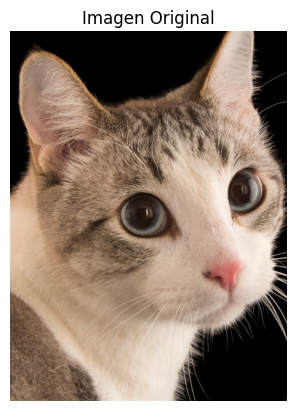

In [247]:
mostrar_imagen_matplotlib(imagen_original, titulo="Imagen Original")

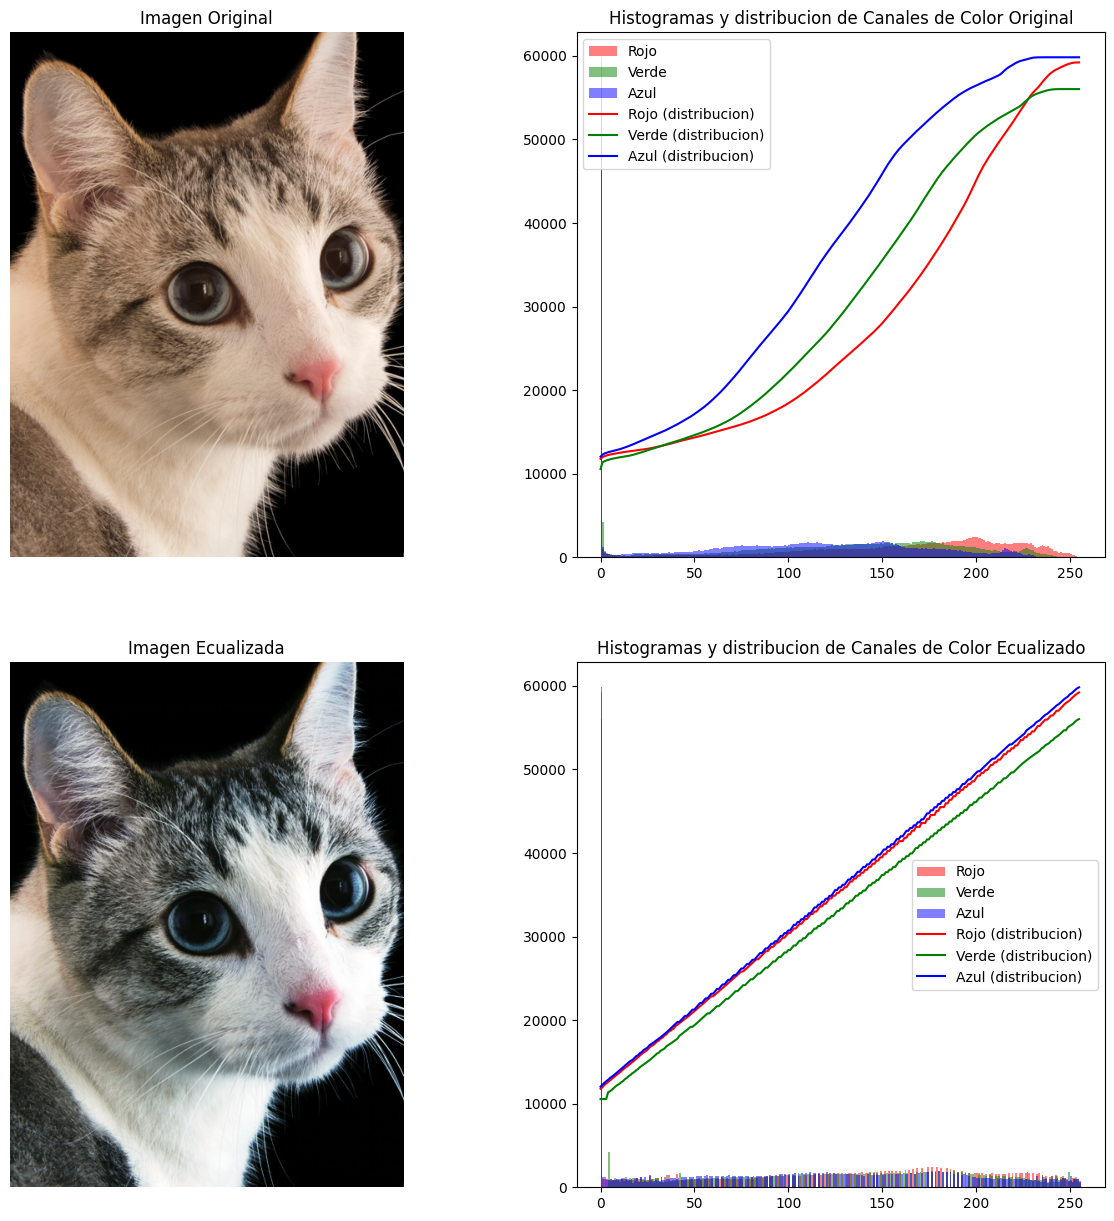

In [248]:
imagen_modificada = ajustar_contraste_histograma(imagen_modificada)

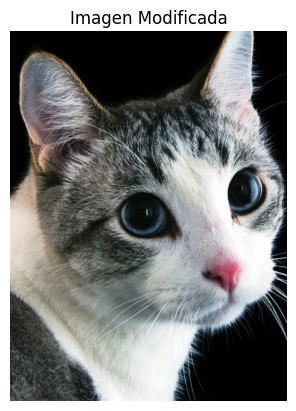

In [249]:
mostrar_imagen_matplotlib(imagen_modificada, titulo="Imagen Modificada")


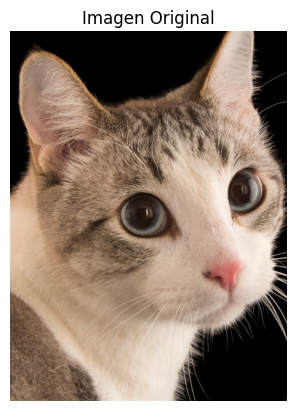

In [250]:
mostrar_imagen_matplotlib(imagen_original, titulo="Imagen Original")


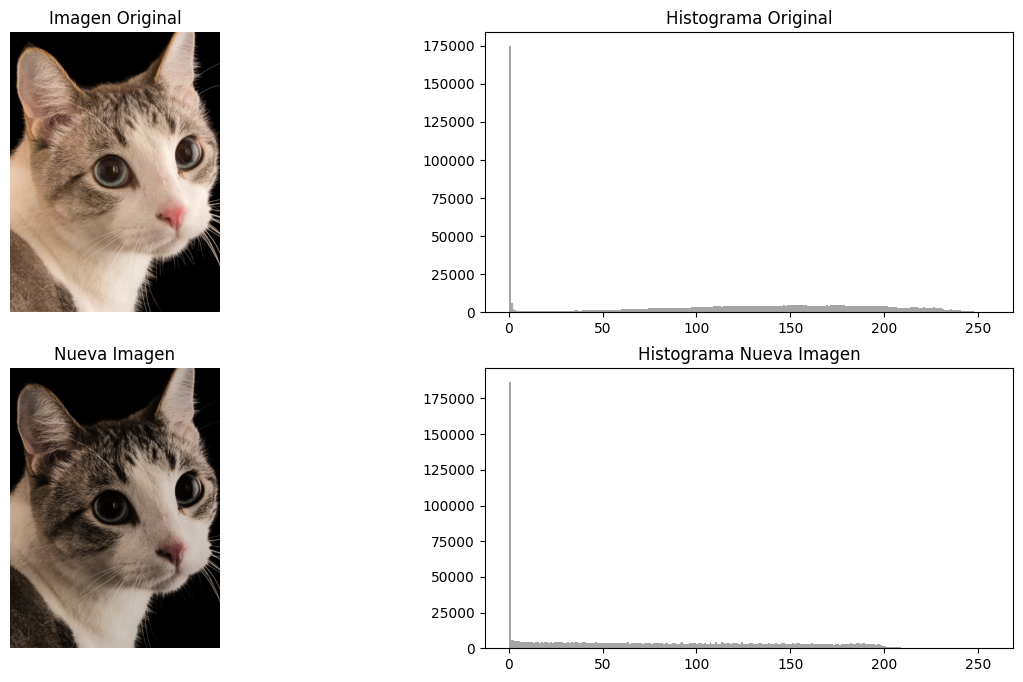

In [251]:
imagen_modificada = ajustar_contraste_histograma_propio(imagen_original)

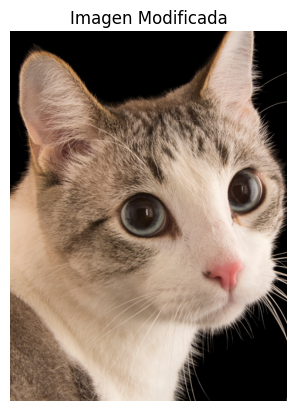

In [252]:
imagen_modificada = imagen_original.copy()
mostrar_imagen_matplotlib(imagen_modificada, titulo="Imagen Modificada")

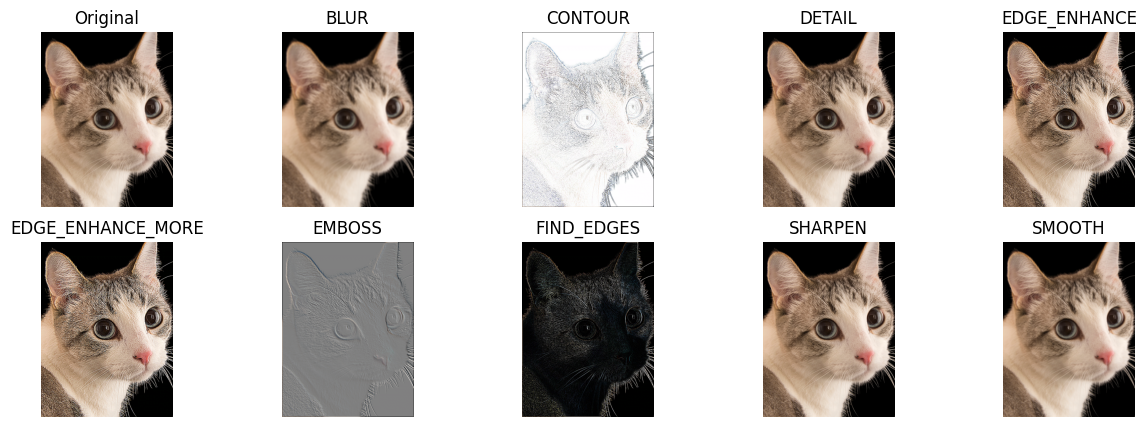

In [253]:
mostrar_plt_de_filtros(imagen_modificada)


In [254]:
filtro = seleccionar_filtro()
if filtro is not None:
   imagen_modificada = aplicar_filtro(filtro, imagen_modificada)
   print(f"Se ha aplicado el filtro '{filtro}'")


Seleccione un filtro:
1. BLUR
2. CONTOUR
3. DETAIL
4. EDGE_ENHANCE
5. EDGE_ENHANCE_MORE
6. EMBOSS
7. FIND_EDGES
8. SHARPEN
9. SMOOTH
Ingrese el número del filtro: 3
Se ha aplicado el filtro 'DETAIL'


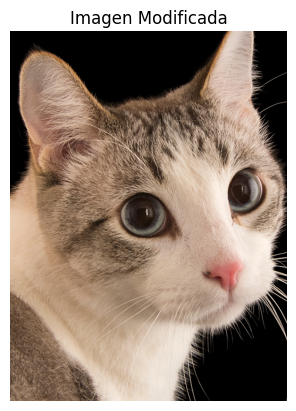

In [255]:
mostrar_imagen_matplotlib(imagen_modificada, titulo="Imagen Modificada")


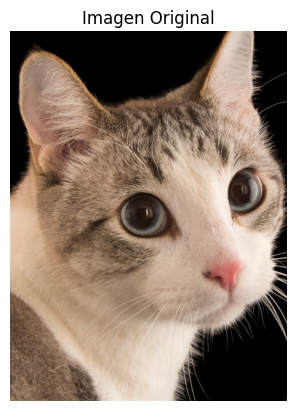

In [256]:
imagen_modificada = imagen_original.copy()
mostrar_imagen_matplotlib(imagen_modificada, titulo="Imagen Original")


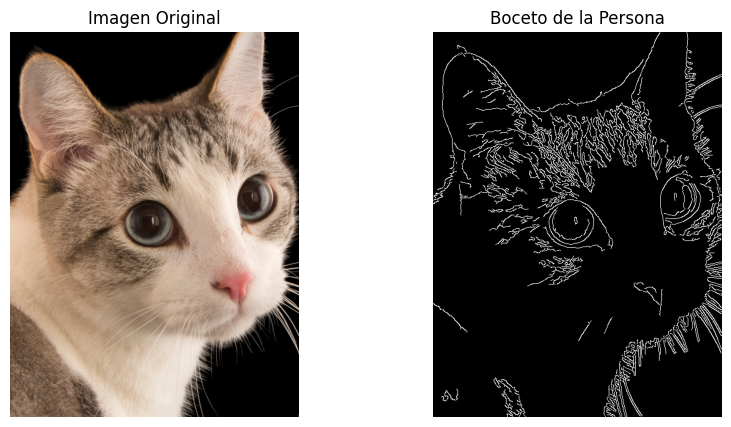

In [257]:
imagen_modificada = dibujar_boceto_persona(imagen_modificada, persona=True)